# Double Layer Network Example

Note: This notebook is desinged to run with Python3 and CPU (no GPU) runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_cpu.png)

####[DNE-01]
Import modules and set a random seed.

In [1]:
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import initializers

np.random.seed(20160615)
tf.set_random_seed(20160614)

plt.rcParams['axes.facecolor'] = 'white'

Using TensorFlow backend.


####[DNE-02]
Generate a training dateset.

In [0]:
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1', 'x2'])
    df['t'] = t
    return df

df0 = generate_datablock(30, [-7,-7], 18, 1)
df1 = generate_datablock(30, [-7,7], 18, 0)
df2 = generate_datablock(30, [7,-7], 18, 0)
df3 = generate_datablock(30, [7,7], 18, 1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

####[DNE-03]
Store the coordinates $(x_1,x_2)$ and label values $t$ into NumPy arrays.

In [0]:
train_x = train_set[['x1', 'x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

####[DNE-04]
Define a model for the binary classification using two hidden layers.

Weights in the hidden layers are initialized with random values.

In [4]:
model = models.Sequential()
model.add(layers.Dense(2, activation='tanh',input_shape=(2,),
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden1'))
model.add(layers.Dense(2, activation='tanh',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden2'))
model.add(layers.Dense(1, activation='sigmoid',
                       name='output'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 2)                 6         
_________________________________________________________________
hidden2 (Dense)              (None, 2)                 6         
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


####[DNE-05]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

####[DNE-06]
Train the model.

In [6]:
history = model.fit(train_x, train_t,
                    batch_size=len(train_set), epochs=2000, verbose=0)

Instructions for updating:
Use tf.cast instead.


####[DNE-07]
Plot charts for the accuracy and loss values.

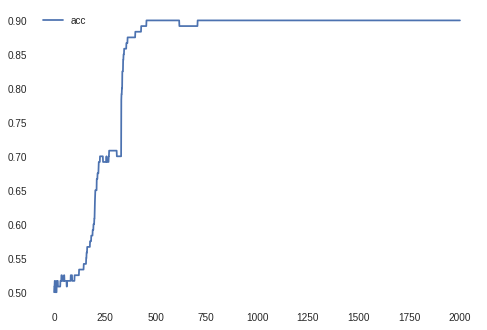

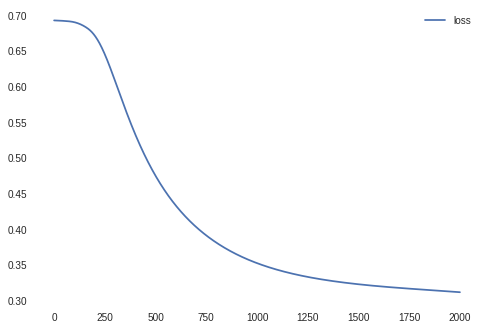

In [7]:
DataFrame({'acc': history.history['acc']}).plot()
DataFrame({'loss': history.history['loss']}).plot()

####[DNE-08]
Plot charts for the final result.

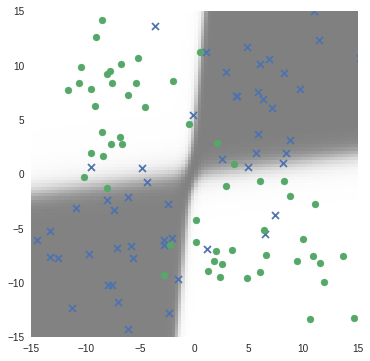

In [8]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(6, 6))
subplot = fig.add_subplot(1, 1, 1)
subplot.grid(None)
subplot.set_ylim([-15, 15])
subplot.set_xlim([-15, 15])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations = [[x1, x2] for x2 in np.linspace(-15, 15, 100) 
                      for x1 in np.linspace(-15, 15, 100)]
p_vals = model.predict(np.array(locations)).reshape((100, 100))
subplot.imshow(p_vals, origin='lower', extent=(-15, 15, -15, 15),
               cmap=plt.cm.gray_r, alpha=0.5)